## Comparing all filtering methods

In [1]:
import Simulator
import Observation
import Statistics

import KalmanFilter
import ETKalmanFilter
import SLETKalmanFilter
import IEWParticleFilter

import Comparer

## Loading simulator 

For Kalman filtering we have to be able to propagate a Gaussian distribution in time and to have access to the linear operators

In [2]:
timestamp = "2021_08_26-12_22_18"

grid, simulator = Simulator.from_file(timestamp)

## Loading observations 

Observation positions which are fixed for a setup and values from the truth

In [3]:
obs_timestamp = "2021_08_26-12_22_28"
observation = Observation.from_file(grid, timestamp, obs_timestamp)

Remember to set observation positions and to set/observe values!


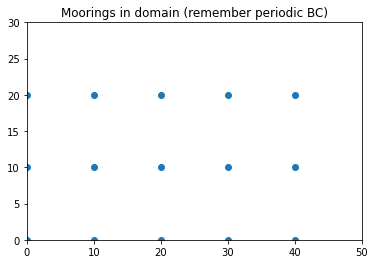

In [4]:
observation.plot_positions()

## Definition of initial distribution 

The inital state is equipped with a Gaussian distribution specified by its mean and covariance. 

In [5]:
prior_args = Statistics.prior_args_from_file(timestamp)

## New truth if changes intended

In [6]:
new_truth = True

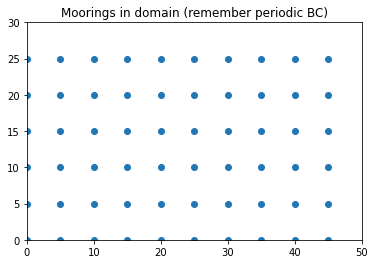

N_y =  60
0
1
2
3
4
5
6
7
8
9


In [7]:
if new_truth:
    observation.clear_observations()
    observation.set_regular_positions(5)
    observation.plot_positions()
    print("N_y = ", len(observation.positions))


    # Temp changes only!
    simulator = Simulator.Simulator(grid, 
                                D=0.125, 
                                v=[1.5,0.5],
                                zeta=-0.0001,
                                dt=0.01,
                                noise_matern_phi=7.0,
                                noise_stddev=0.125)

    statistics_truth = Statistics.Statistics(simulator, 1)
    statistics_truth.set_prior(prior_args)

    for t in range(10):
        print(t)
        statistics_truth.propagate(25)
        #statistics_truth.plot()
        observation.observe(statistics_truth.mean)

In [8]:
stop_simulation_early = False

if stop_simulation_early:
    observation.N_obs = 1


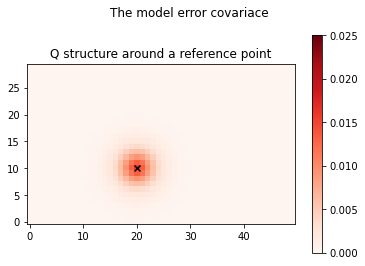

In [9]:
from matplotlib import pyplot as plt
import numpy as np
plt.suptitle("The model error covariace")
plt.title("Q structure around a reference point")
plt.imshow(np.reshape(simulator.cov_matrix()[520,:],(grid.ny,grid.nx)), origin="lower", vmin=0.0, vmax=0.025,cmap="Reds")
plt.colorbar()
plt.scatter(20,10, marker="x", c="black")

## Kalman filtering

Updating/conditioning the distributions at every observation time

Please remember to set priors!


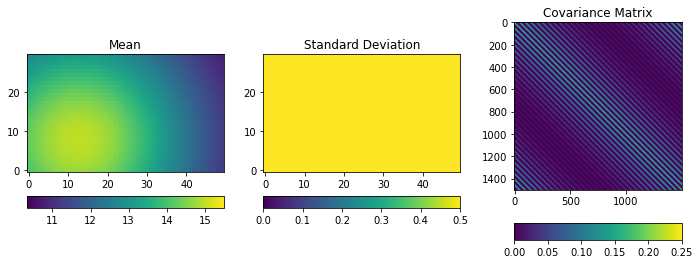

In [10]:
statistics_kf = Statistics.Statistics(simulator, safe_history=True)
statistics_kf.set_prior(prior_args)

statistics_kf.plot()

In [11]:
kalmanFilter = KalmanFilter.Kalman(statistics_kf, observation)

for t in range(observation.N_obs):
    print(t)
    statistics_kf.propagate(25)
    kalmanFilter.filter(statistics_kf.mean, statistics_kf.cov, observation.obses[t])
    #statistics_kf.plot()

0
1
2
3
4
5
6
7
8
9


# Ensemble-based filtering 

In [12]:
N_e = 50

## ETKF filtering

Updating/conditioning the distributions at every observation time

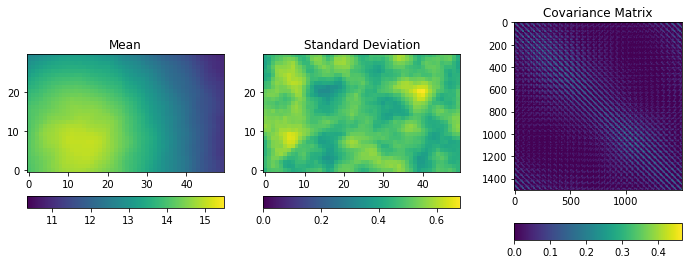

In [13]:
statistics_etkf = Statistics.Statistics(simulator, N_e, safe_history=True)
statistics_etkf.set_prior(prior_args)

statistics_etkf.plot()

In [14]:
etkFilter = ETKalmanFilter.ETKalman(statistics_etkf, observation)

for t in range(observation.N_obs):
    print(t)
    statistics_etkf.propagate(25)
    etkFilter.filter(statistics_etkf.ensemble.ensemble, observation.obses[t])
    #statistics_etkf.plot()

0
1
2
3
4
5
6
7
8
9


## LETKF filtering

Updating/conditioning the distributions at every observation time

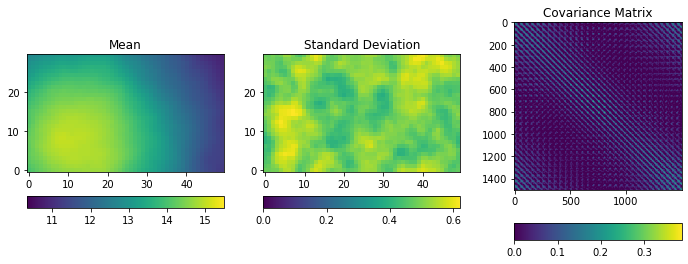

In [15]:
statistics_letkf = Statistics.Statistics(simulator, N_e, safe_history=True)
statistics_letkf.set_prior(prior_args)

statistics_letkf.plot()

In [16]:
from importlib import reload
reload(SLETKalmanFilter)

<module 'SLETKalmanFilter' from '/home/florianb/advectionDiffusion/SLETKalmanFilter.py'>

In [17]:
# We choose the scale_r as about 2/3 of the correlation length in grid cells 
scale_r = 6

In [18]:
sletkFilter = SLETKalmanFilter.SLETKalman(statistics_letkf, observation, scale_r)

In [19]:
sletkFilter.groups

[[0, 4],
 [1, 5],
 [11, 15],
 [10, 14],
 [20, 24],
 [21, 27],
 [31, 57],
 [30, 54],
 [40, 6],
 [41, 7],
 [51, 17],
 [50, 16],
 [59],
 [49, 43],
 [48, 53],
 [58, 52],
 [8, 42],
 [9, 32],
 [19, 55],
 [18, 12],
 [28, 22],
 [29, 25],
 [39, 35],
 [38, 34],
 [37, 13],
 [47, 23],
 [46, 2],
 [36, 3],
 [26],
 [45],
 [44],
 [33, 56]]

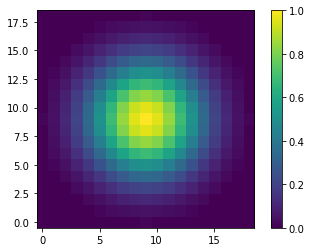

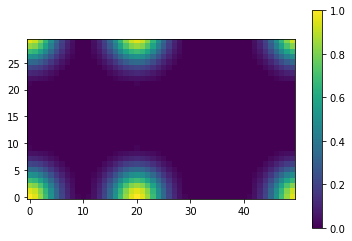

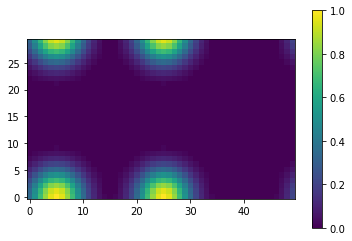

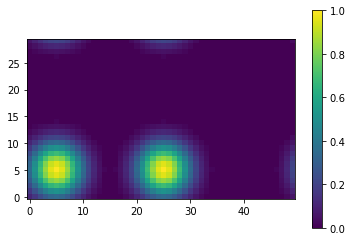

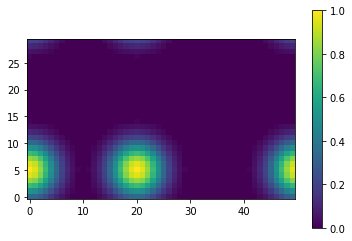

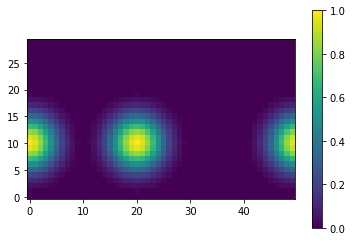

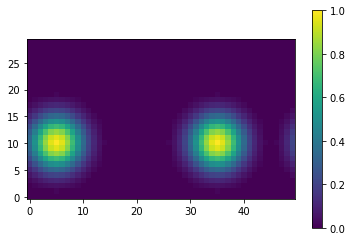

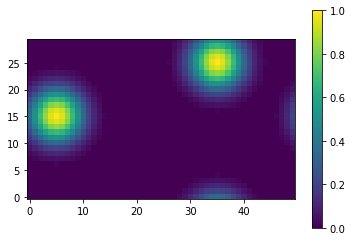

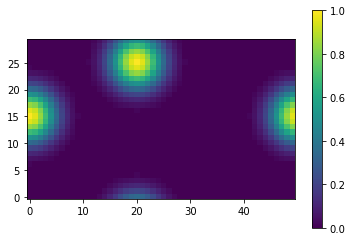

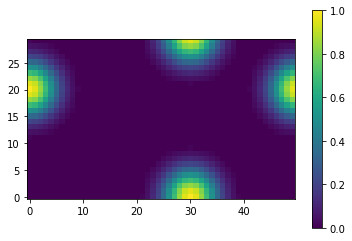

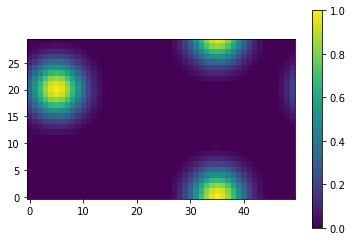

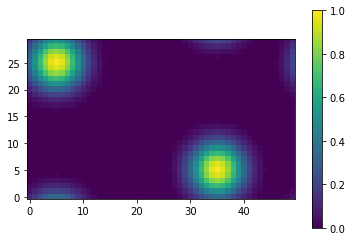

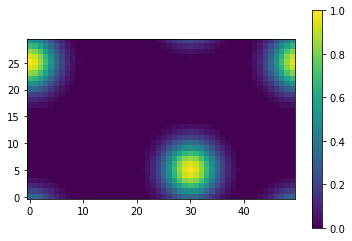

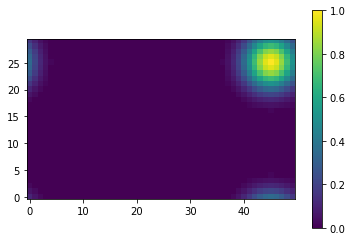

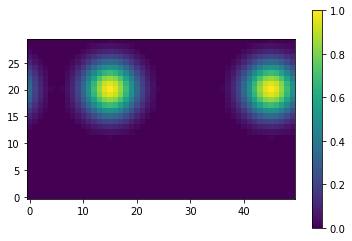

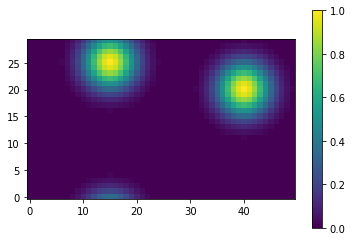

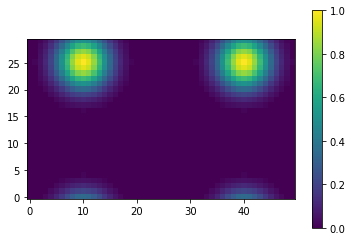

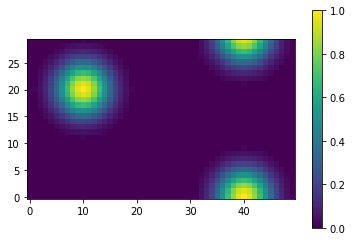

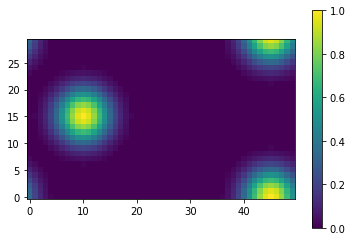

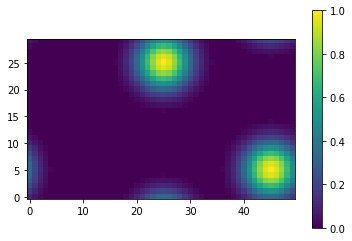

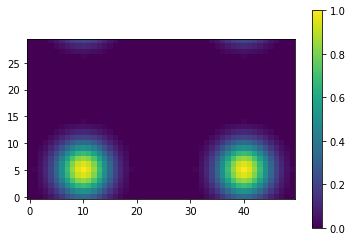

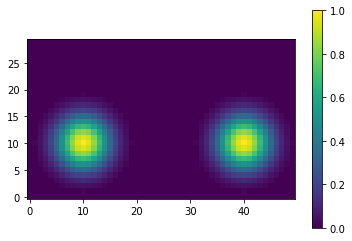

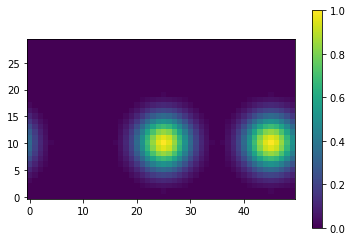

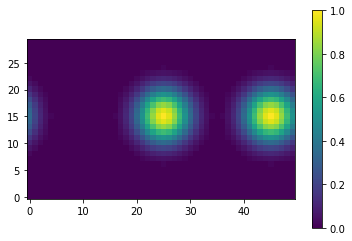

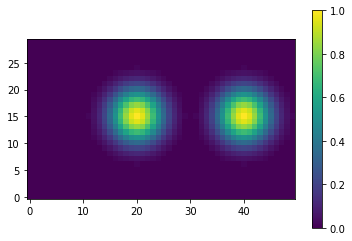

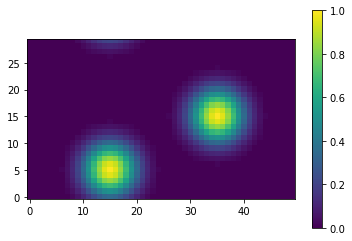

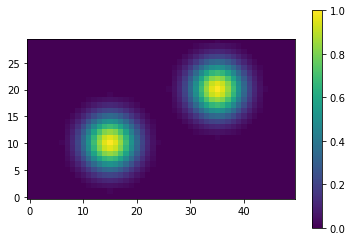

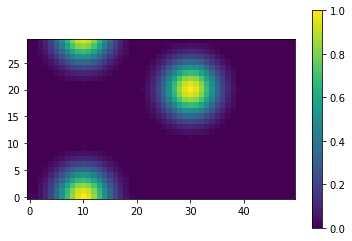

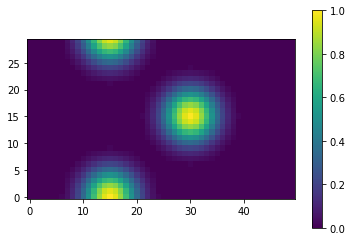

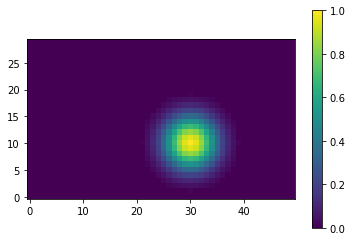

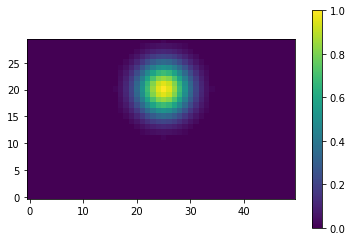

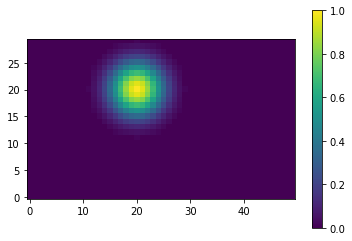

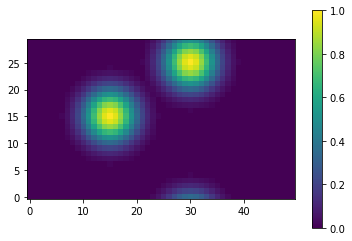

In [20]:
from matplotlib import pyplot as plt
plt.imshow(sletkFilter.W_loc, origin="lower", vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()
for g in range(len(sletkFilter.groups)):
    plt.imshow(sletkFilter.W_analyses[g], origin="lower", vmin=0.0, vmax=1.0)
    plt.colorbar()
    plt.show()

In [21]:
for t in range(observation.N_obs):
    print(t)
    statistics_letkf.propagate(25)
    sletkFilter.filter(statistics_letkf.ensemble.ensemble, observation.obses[t])
    #statistics_letkf.plot()

0
1
2
3
4
5
6
7
8
9


## IEWPF filtering

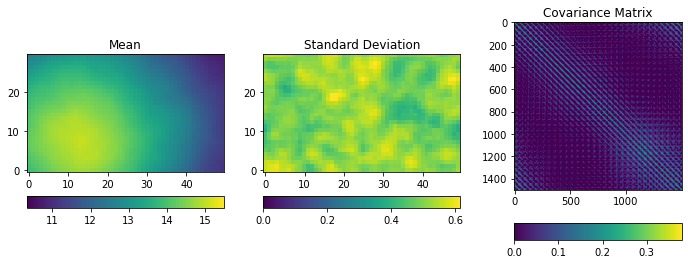

In [22]:
statistics_iewpf = Statistics.Statistics(simulator, N_e, safe_history=True)
statistics_iewpf.set_prior(prior_args)

statistics_iewpf.plot()

In [23]:
from importlib import reload
reload(IEWParticleFilter)

<module 'IEWParticleFilter' from '/home/florianb/advectionDiffusion/IEWParticleFilter.py'>

In [24]:
iewpFilter = IEWParticleFilter.IEWParticle(statistics_iewpf, observation, 0.55)

for t in range(observation.N_obs):
    print(t)
    statistics_iewpf.propagate(25, model_error=False)
    iewpFilter.filter(statistics_iewpf.ensemble.ensemble, observation.obses[t])
    #statistics_iewpf.plot()

0
Model error in historical forecast added
1
Model error in historical forecast added
2
Model error in historical forecast added
3
Model error in historical forecast added
4
Model error in historical forecast added
5
Model error in historical forecast added
6
Model error in historical forecast added
7
Model error in historical forecast added
8
Model error in historical forecast added
9
Model error in historical forecast added


## Monte Carlo Experiment

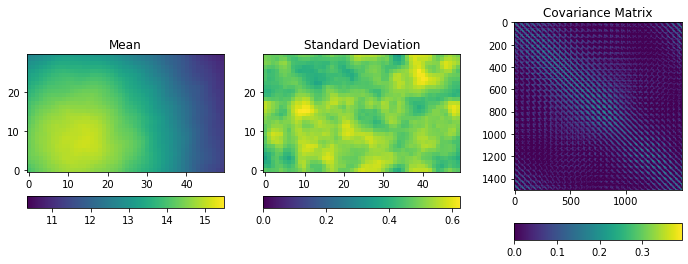

In [25]:
statistics_mc = Statistics.Statistics(simulator, N_e, safe_history=True)
statistics_mc.set_prior(prior_args)

statistics_mc.plot()

In [26]:
for t in range(observation.N_obs):
    print(t)
    statistics_mc.propagate(25, model_error=False)
    #statistics_mc.plot()

0
Model error in historical forecast added
1
Model error in historical forecast added
2
Model error in historical forecast added
3
Model error in historical forecast added
4
Model error in historical forecast added
5
Model error in historical forecast added
6
Model error in historical forecast added
7
Model error in historical forecast added
8
Model error in historical forecast added
9
Model error in historical forecast added


## Comparison

In [27]:
result_timestamp = None

In [28]:
from importlib import reload  
reload(Comparer)

<module 'Comparer' from '/home/florianb/advectionDiffusion/Comparer.py'>

In [29]:
comparer = Comparer.Comparer(statistics_kf, statistics_etkf, statistics_letkf, statistics_iewpf)

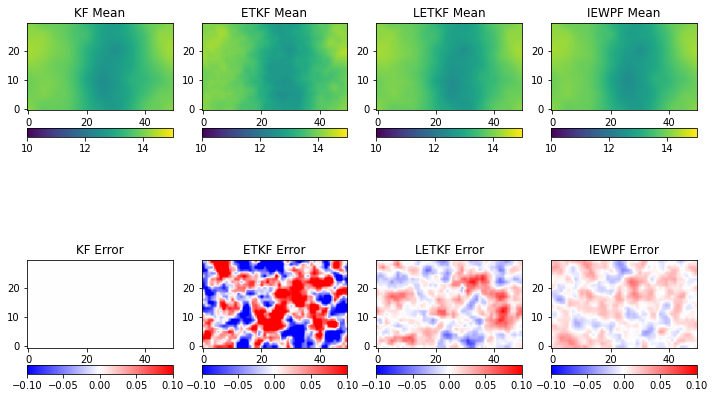

In [30]:
mean_err_etkf, mean_err_letkf, mean_err_iewpf = comparer.mean_plots()

In [31]:
save_rmse = False

In [32]:
if save_rmse: 
    import numpy as np
    import datetime 
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    
    result_timestamp = datetime.datetime.now().strftime("%Y_%m_%d-%H_%M_%S")
    filepath = "experiment_files/experiment_" + timestamp + "/"
    
    fig1, ax1 = plt.subplots(figsize=(6,4))
    im1 = ax1.imshow(mean_err_etkf, origin = "lower", vmin=-0.175, vmax=0.175, cmap="bwr")
    plt.savefig(filepath + "rmse_etkf_" + result_timestamp + ".png")
    plt.show()

    fig2, ax2 = plt.subplots(figsize=(6,4))
    im2 = ax2.imshow(mean_err_letkf, origin = "lower", vmin=-0.175, vmax=0.175, cmap="bwr")
    ax_divider = make_axes_locatable(ax2)
    ax_cb = ax_divider.append_axes("right", size="3%", pad="5%")
    cbar = plt.colorbar(im2, cax=ax_cb)
    cbar.ax.tick_params(labelsize=14) 
    plt.savefig(filepath + "rmse_letkf_" + result_timestamp + ".png")
    plt.show()

    fig3, ax3 = plt.subplots(figsize=(6,4))
    im3 = ax3.imshow(mean_err_iewpf, origin = "lower", vmin=-0.175, vmax=0.175, cmap="bwr")
    plt.savefig(filepath + "rmse_iewpf_" + result_timestamp + ".png")
    plt.show()

In [33]:
mean_rmse_kf, mean_rmse_etkf, mean_rmse_letkf, mean_rmse_iewpf = comparer.mean_rmse()

print("RMSE of KF = ", mean_rmse_kf)
print("RMSE of ETKF = ", mean_rmse_etkf)
print("RMSE of LETKF = ", mean_rmse_letkf)
print("RMSE of IEWPF = ", mean_rmse_iewpf)

RMSE of KF =  0.0
RMSE of ETKF =  3.184391266033822
RMSE of LETKF =  1.0034308306717972
RMSE of IEWPF =  0.6637050108535999


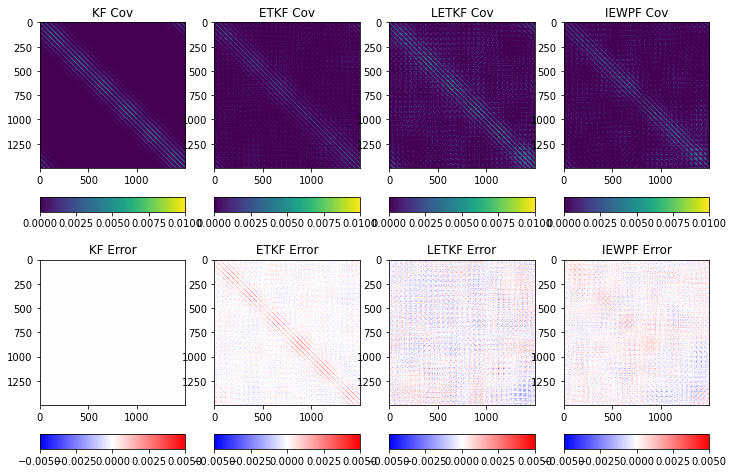

In [34]:
comparer.cov_plots()

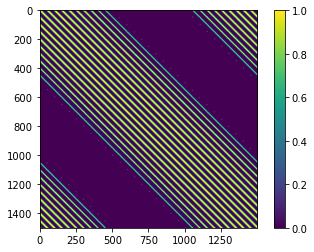

Meaning  0.20333333333333334 % of the domain is considered as close


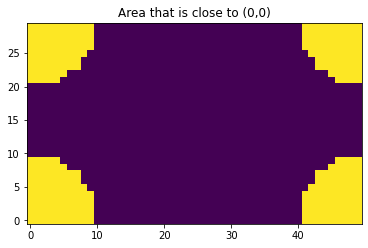

In [35]:
plt.imshow(grid.dist_mat<1)
plt.colorbar()
plt.show()

print("Meaning ", np.sum(grid.dist_mat[0]<1)/(grid.dist_mat.shape[0]), "% of the domain is considered as close")

plt.imshow(np.reshape(grid.dist_mat[0]<1,(grid.ny, grid.nx)), origin="lower")
plt.title("Area that is close to (0,0)")
plt.show()

In [36]:
cov_frob_kf, cov_frob_etkf, cov_frob_letkf, cov_frob_iewpf = comparer.cov_frobenius_dist()

print("Frobenius error in Cov matrix (KF) = ", cov_frob_kf)
print("Frobenius error in Cov matrix (ETKF) = ", cov_frob_etkf)
print("Frobenius error in Cov matrix (LETKF) = ", cov_frob_letkf)
print("Frobenius error in Cov matrix (IEWPF) = ", cov_frob_iewpf)

Frobenius error in Cov matrix (KF) =  0.0
Frobenius error in Cov matrix (ETKF) =  1.387745440998178
Frobenius error in Cov matrix (LETKF) =  2.5427147481891668
Frobenius error in Cov matrix (IEWPF) =  2.1573058424518234


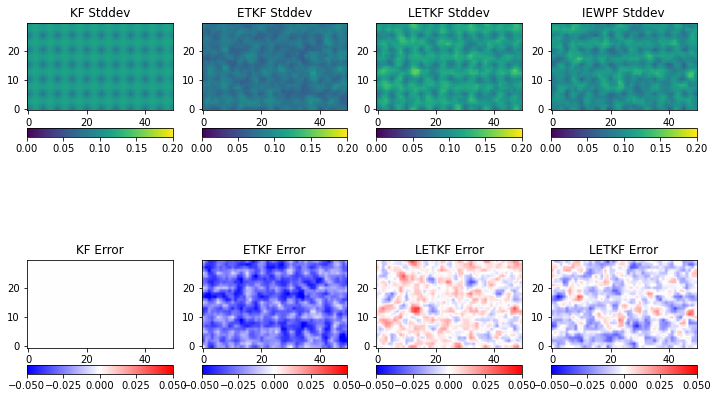

In [37]:
comparer.stddev_plots()

In [38]:
stddev_rmse_kf, stddev_rmse_etkf, stddev_rmse_letkf, stddev_rmse_iewpf = comparer.stddev_rmse()

print("RMSE of KF = ", stddev_rmse_kf)
print("RMSE of ETKF = ", stddev_rmse_etkf)
print("RMSE of LETKF = ", stddev_rmse_letkf)
print("RMSE of IEWPF = ", stddev_rmse_iewpf)

RMSE of KF =  0.0
RMSE of ETKF =  1.1687283339466812
RMSE of LETKF =  0.3528457608962231
RMSE of IEWPF =  0.477552079130795


In [39]:
reload(Comparer)
comparer = Comparer.Comparer(statistics_kf, statistics_etkf, statistics_letkf, statistics_iewpf)

In [40]:
comparer.set_poi([0,0])
comparer.set_poi([25,15])
comparer.set_poi([1,0])

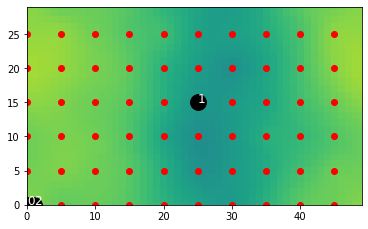

In [41]:
comparer.poi_plot(observation)

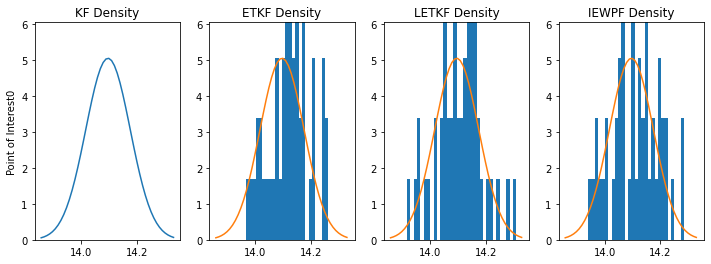

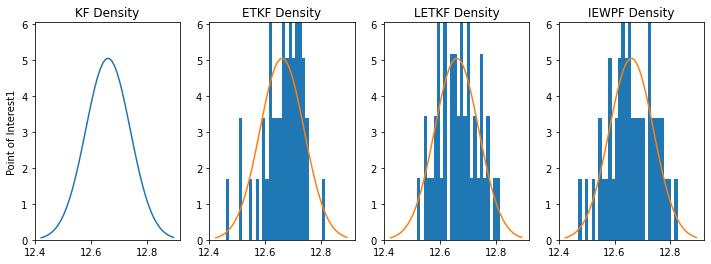

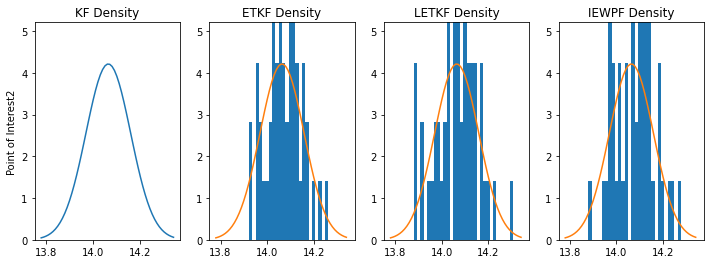

In [42]:
comparer.poi_hist(0)
comparer.poi_hist(1)
comparer.poi_hist(2)

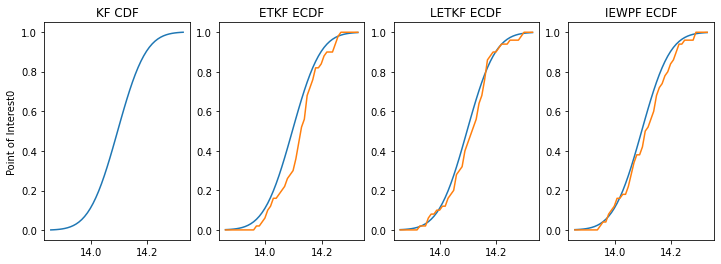

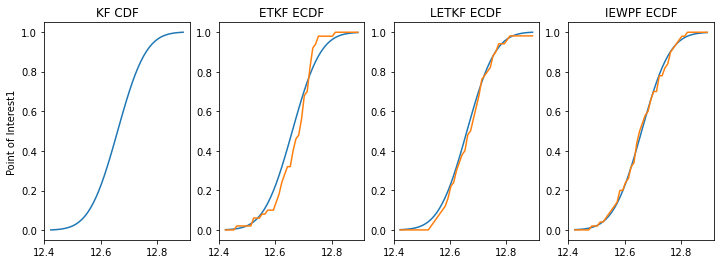

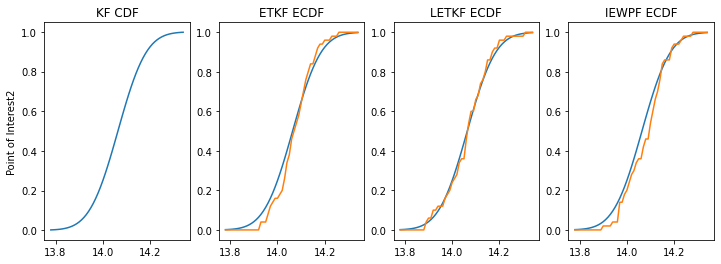

In [43]:
cdf0, ecdf_etkf0, ecdf_letkf0, ecdf_iewpf0 = comparer.poi_ecdf_plots(0)
cdf1, ecdf_etkf1, ecdf_letkf1, ecdf_iewpf1 = comparer.poi_ecdf_plots(1)
cdf2, ecdf_etkf2, ecdf_letkf2, ecdf_iewpf2 = comparer.poi_ecdf_plots(2)

In [44]:
save_cdf = False

In [45]:
if save_cdf: 
    import numpy as np
    import datetime 
    
    if result_timestamp is None:
        result_timestamp = datetime.datetime.now().strftime("%Y_%m_%d-%H_%M_%S")
    filepath = "experiment_files/experiment_" + timestamp + "/"
    cdf_file = filepath + "cdf_" + result_timestamp
    
    x = np.arange(10,15,0.01)
    cdf_table = np.column_stack((x,cdf0(x),cdf1(x),cdf2(x)))
    np.savetxt(cdf_file, cdf_table)

    ecdf_file = filepath + "ecdf_" + result_timestamp

    y_ecdf = np.arange(0,1,1/N_e)+1/N_e
    ecdf_table = np.column_stack( (y_ecdf, ecdf_etkf0, ecdf_letkf0, ecdf_iewpf0) ) 
    ecdf_table = np.column_stack( (ecdf_table, ecdf_etkf1, ecdf_letkf1, ecdf_iewpf1))
    ecdf_table = np.column_stack( (ecdf_table, ecdf_etkf2, ecdf_letkf2, ecdf_iewpf2))
    ecdf_table = np.row_stack( (np.repeat(0,10), ecdf_table, np.hstack((np.array([1]),np.repeat(15,9)))) ) 
    np.savetxt(ecdf_file, ecdf_table)

In [46]:
ecdf_err_etkf, ecdf_err_letkf, ecdf_err_iewpf = comparer.poi_ecdf_err(0)

print("Difference at pos0 (ETKF) = ", ecdf_err_etkf)
print("Difference at pos0 (LETKF) = ",ecdf_err_letkf)
print("Difference at pos0 (IEWPF) = ",ecdf_err_iewpf)

ecdf_err_etkf, ecdf_err_letkf, ecdf_err_iewpf = comparer.poi_ecdf_err(1)

print("Difference at pos1 (ETKF) = ", ecdf_err_etkf)
print("Difference at pos1 (LETKF) = ",ecdf_err_letkf)
print("Difference at pos1 (IEWPF) = ",ecdf_err_iewpf)

ecdf_err_etkf, ecdf_err_letkf, ecdf_err_iewpf = comparer.poi_ecdf_err(2)

print("Difference at pos2 (ETKF) = ", ecdf_err_etkf)
print("Difference at pos2 (LETKF) = ",ecdf_err_letkf)
print("Difference at pos2 (IEWPF) = ",ecdf_err_iewpf)

/home/florianb/advectionDiffusion/Comparer.py:406: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  ecdf_err_etkf = scipy.integrate.quad(diff_etkf, xmin, xmax, limit=100)[0]
/home/florianb/advectionDiffusion/Comparer.py:407: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and call

Difference at pos0 (ETKF) =  0.02833474444734531
Difference at pos0 (LETKF) =  0.013533004595147865
Difference at pos0 (IEWPF) =  0.015837724662372613
Difference at pos1 (ETKF) =  0.02068301908796375
Difference at pos1 (LETKF) =  0.01042956231933592
Difference at pos1 (IEWPF) =  0.005601423683871204
Difference at pos2 (ETKF) =  0.018305396938446745
Difference at pos2 (LETKF) =  0.009249963487221095
Difference at pos2 (IEWPF) =  0.019652011383250692


## Correlation Study

Analytic correlation of two points $s_0$ at time $t_0$ and $s_1$ at time $t_1 = t_0 + \Delta t$ where sites are chosen in advection direction

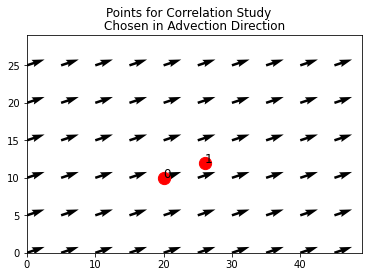

In [47]:
points = [[20,10],[26,12]]

simulator.plot_correlation_points(points)


Analytical calculations as suggested by Jo

In [48]:
statistics_kf.evaluate_correlation(points)

0.19069712980505876

Empirical estimations

$Corr = \frac{1}{N_e-1} \frac{1}{\sigma_{t=9}(x_0)\sigma_{t=10}(x_2)} \sum (c^e_{t=9}(x_0) - \overline{c_{t=9}(x_0)})(c^e_{t=10}(x_1) - \overline{c_{t=10}(x_1)}) $

In [49]:
statistics_etkf.evaluate_correlation(points)

0.259059953271478

In [50]:
statistics_letkf.evaluate_correlation(points)

0.2513987253323595

In [51]:
statistics_iewpf.evaluate_correlation(points)

0.12184759405104935

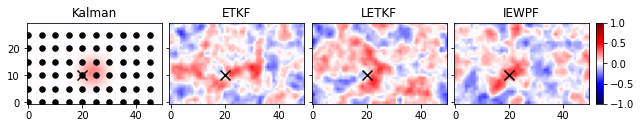

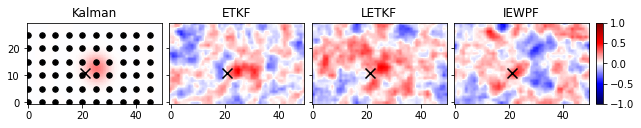

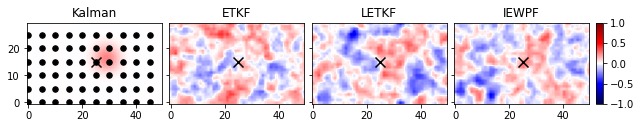

In [52]:
corr_ref_pois = [[20,10],[21,11],[25,15]]
comparer.set_corr_ref_pois(corr_ref_pois)

for p in range(len(corr_ref_pois)):
    corr_grid_kf, corr_grid_etkf, corr_grid_letkf, corr_grid_iewpf = comparer.corr_p2p_plot(p, observation)

In [53]:
save_corr_p2p = False

In [54]:
if save_corr_p2p: 
    import numpy as np
    import datetime 
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    
    if result_timestamp is None:
        result_timestamp = datetime.datetime.now().strftime("%Y_%m_%d-%H_%M_%S")
    filepath = "experiment_files/experiment_" + timestamp + "/"

    for i in [0,2]:
        corr_grid_kf, corr_grid_etkf, corr_grid_letkf, corr_grid_iewpf = comparer.corr_p2p_plot(i, observation)
    
        fig0, ax0 = plt.subplots(figsize=(6,4))
        im0 = ax0.imshow(corr_grid_kf.T, vmin=-1, vmax=1, cmap="seismic", origin="lower")
        ax0.scatter(corr_ref_pois[i][0], corr_ref_pois[i][1], s=150, c="black", marker="x")
        if i == 0:
            ax0.annotate(r"$s_3$",(21,7), fontsize=20)
        elif i == 2:
            ax0.annotate(r"$s_2$",(26,12), fontsize=20)
        ax0.scatter(np.array(observation.positions)[:,0],np.array(observation.positions)[:,1], c="black", s=30)
        plt.savefig(filepath + "corr_p2p_kf_" + str(i) + "_" + result_timestamp + ".png")
        plt.show()
        
        fig1, ax1 = plt.subplots(figsize=(6,4))
        im1 = ax1.imshow(corr_grid_etkf.T, vmin=-1, vmax=1, cmap="seismic", origin="lower")
        ax1.scatter(corr_ref_pois[i][0], corr_ref_pois[i][1], s=150, c="black", marker="x")
        plt.savefig(filepath + "corr_p2p_etkf_" + str(i) + "_" + result_timestamp + ".png")
        plt.show()

        fig2, ax2 = plt.subplots(figsize=(6,4))
        im2 = ax2.imshow(corr_grid_letkf.T, vmin=-1, vmax=1, cmap="seismic", origin="lower")
        ax2.scatter(corr_ref_pois[i][0], corr_ref_pois[i][1], s=150, c="black", marker="x")
        ax_divider = make_axes_locatable(ax2)
        ax_cb = ax_divider.append_axes("right", size="3%", pad="5%")
        cbar = plt.colorbar(im2, cax=ax_cb)
        cbar.ax.tick_params(labelsize=14) 
        plt.savefig(filepath + "corr_p2p_letkf_" + str(i) + "_" + result_timestamp + ".png")
        plt.show()

        fig3, ax3 = plt.subplots(figsize=(6,4))
        im3 = ax3.imshow(corr_grid_iewpf.T, vmin=-1, vmax=1, cmap="seismic", origin="lower")
        ax3.scatter(corr_ref_pois[i][0], corr_ref_pois[i][1], s=150, c="black", marker="x")
        plt.savefig(filepath + "corr_p2p_iewpf_" + str(i) + "_" + result_timestamp + ".png")
        plt.show()

In [55]:
print("Maximal correlation KF", np.max(corr_grid_kf))
print("Maximal correlation ETKF", np.max(corr_grid_etkf))
print("Maximal correlation LETKF", np.max(corr_grid_letkf))
print("Maximal correlation IEWPF", np.max(corr_grid_iewpf))

Maximal correlation KF 0.24680654889041587
Maximal correlation ETKF 0.40563978494835085
Maximal correlation LETKF 0.3423509061186369
Maximal correlation IEWPF 0.34339124664239723


In [56]:
import numpy as np
print("ETKF difference ",  np.linalg.norm(corr_grid_kf - corr_grid_etkf))
print("LETKF difference ", np.linalg.norm(corr_grid_kf - corr_grid_letkf))
print("IEWPF difference ", np.linalg.norm(corr_grid_kf - corr_grid_iewpf))

ETKF difference  5.116785862768523
LETKF difference  5.3308683177749465
IEWPF difference  4.820452514673011


In [57]:
print("ETKF difference close to max ",  np.linalg.norm((corr_grid_kf - corr_grid_etkf)*(corr_grid_kf>0.1)))
print("LETKF difference close to max ", np.linalg.norm((corr_grid_kf - corr_grid_letkf)*(corr_grid_kf>0.1)))
print("IEWPF difference close to max ", np.linalg.norm((corr_grid_kf - corr_grid_iewpf)*(corr_grid_kf>0.1)))

ETKF difference close to max  1.0832137365819283
LETKF difference close to max  0.6161533550027758
IEWPF difference close to max  0.5727871406334336


In [58]:
print("ETKF difference far away max ",  np.linalg.norm((corr_grid_kf - corr_grid_etkf)*(corr_grid_kf<0.1)))
print("LETKF difference far away max ", np.linalg.norm((corr_grid_kf - corr_grid_letkf)*(corr_grid_kf<0.1)))
print("IEWPF difference far away max ", np.linalg.norm((corr_grid_kf - corr_grid_iewpf)*(corr_grid_kf<0.1)))

ETKF difference far away max  5.0008144902913605
LETKF difference far away max  5.2951404197221725
IEWPF difference far away max  4.786301007849625


#### Just some comparison of model error and ensemble covariance

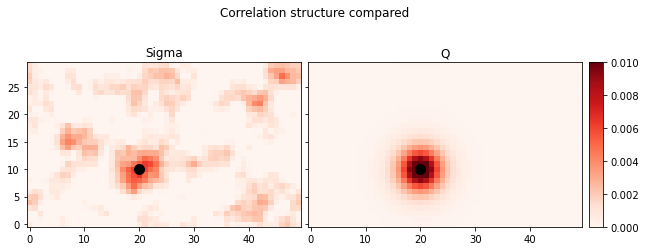

In [59]:
indicator_field = np.zeros((grid.ny,grid.nx))
indicator_field[points[0][1],points[0][0]] = 1.0
idx = np.where(indicator_field.flatten() != 0)

fig = plt.figure(figsize=(8,4))
fig.suptitle("Correlation structure compared")

from mpl_toolkits.axes_grid1 import AxesGrid

axs = AxesGrid(fig, (0.0,0.0,1.0,1.0), nrows_ncols=(1,2), axes_pad=0.1,
    cbar_mode="single", cbar_location="right", cbar_pad=0.1)

fig0 = axs[0].imshow(np.reshape(statistics_iewpf.cov[idx,:],(grid.ny,grid.nx)), origin="lower", vmin=0.0, vmax=0.01,cmap="Reds")
axs[0].set_title("Sigma")
axs[0].scatter(20, 10, s=100, c="black")

fig1 = axs[1].imshow(np.reshape(statistics_iewpf.simulator.Q[idx,:],(grid.ny,grid.nx)), origin="lower", vmin=0.0, vmax=0.01,cmap="Reds")
axs[1].set_title("Q")
axs[1].scatter(20, 10, s=100, c="black")

cbar = axs[0].cax.colorbar(fig0)